In [12]:
# !pip install statsmodels

In [1]:
import pandas as pd
import os
import numpy as np
# We are replacing scipy.stats.pearsonr with statsmodels for multiple regression
import statsmodels.api as sm 
import warnings
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# import seaborn as sns

### Linear Regression

In [2]:
# Suppress warnings, including the FutureWarning from pandas/numpy when creating data
warnings.simplefilter(action='ignore', category=FutureWarning)

def run_multiple_regression_analysis(Y, X):

    X.fillna(0, inplace=True)
    # Add a constant (the intercept term) to the independent variables matrix
    X = sm.add_constant(X)
    
    # Create and fit the OLS (Ordinary Least Squares) model
    model = sm.OLS(Y, X)
    results = model.fit()

    # print(f"Multiple Linear Regression Results for Dependent Variable: '{dependent_variable}'")
    # print(f"Independent Variables: {independent_variables}")
    
    # Display the full summary report
    print("\nFull Regression Summary (R-squared shows overall fit/correlation):")
    print(results.summary().as_text())

    print("\n" + "="*50)

    # 3. Calculate the full Correlation Matrix (still useful for initial inspection)
    # This matrix shows the simple bivariate correlation (r-value) for every pair of variables.
    # print("Bivariate Correlation Matrix (All Variables):")
    # correlation_matrix = df.corr(method='pearson')
    # print(correlation_matrix.to_markdown(floatfmt=".4f"))

    print("\n" + "="*50)

    variable_coef_list = [(name, value) for name, value in results.params.items()]
    return variable_coef_list

In [3]:
directory_path = 'D:/kuliah smt 7/kapsel/ets/train'
# directory_path = 'D:\\kuliah smt 7\\kapsel\\ets\\train'

all_items = os.listdir(directory_path)
all_items

['city_indexes.csv',
 'city_search_index.csv',
 'land_transactions.csv',
 'land_transactions_nearby_sectors.csv',
 'new_house_transactions.csv',
 'new_house_transactions_nearby_sectors.csv',
 'pre_owned_house_transactions.csv',
 'pre_owned_house_transactions_nearby_sectors.csv',
 'sector_POI.csv']

In [4]:
# file_path = 'D:/kuliah smt 7/kapsel/ets/train/city_indexes.csv'
file_path = os.path.join(directory_path, all_items[-1])
# print(file_path)
# print(directory_path)

try:
    dfSector = pd.read_csv(file_path)
    print("CSV data loaded successfully into a pandas DataFrame.")
    # print(df.head()) # Display the first 5 rows to confirm
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

# dfSector.head()
# dfSector['sector'].unique()

CSV data loaded successfully into a pandas DataFrame.


### Land

In [5]:
# file_path = 'D:/kuliah smt 7/kapsel/ets/train/city_indexes.csv'
file_path = os.path.join(directory_path, all_items[2])
# print(file_path)
# print(directory_path)

try:
    dfLand = pd.read_csv(file_path)
    print("CSV data loaded successfully into a pandas DataFrame.")
    # print(df.head()) # Display the first 5 rows to confirm
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

dfLand.head()

CSV data loaded successfully into a pandas DataFrame.


,month,sector,num_land_transactions,construction_area,planned_building_area,transaction_amount
0,2019-Apr,sector 59,2,72312.00,211124.00,452593.0
1,2019-Apr,sector 92,2,50992.48,152977.44,192200.0
2,2019-Apr,sector 86,1,12460.00,56706.00,196571.0
3,2019-Apr,sector 55,1,45404.90,136214.70,122600.0
4,2019-Apr,sector 25,1,28801.00,86403.00,139067.0


In [45]:
# 1. Group the DataFrame by 'sector'
dfLand_bySector = dfLand.groupby('sector').sum().reset_index()
dfLand_bySector_sorted = dfLand_bySector.sort_values(by='num_land_transactions', ascending=False)
dfLand_bySector_sorted_10 = dfLand_bySector_sorted[:10]
dfLand_bySector_sorted_10 = dfLand_bySector_sorted_10.sort_values(by='num_land_transactions', ascending=True)
dfLand_bySector_sorted_10

,sector,month,num_land_transactions,construction_area,planned_building_area,transaction_amount
14,sector 24,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,8,319618.41,882878.20,2932397.15
41,sector 50,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,9,401009.65,1248084.63,1321120.00
59,sector 68,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,10,411811.93,1011169.92,603666.00
52,sector 61,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,10,488757.00,1481527.00,2673529.00
9,sector 18,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,12,838641.00,2748743.00,2054065.00
50,sector 6,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,14,1077241.04,2625301.30,2604260.00
83,sector 92,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,15,788755.72,2337452.77,2456420.00
30,sector 4,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,23,1193419.00,3772377.00,4486436.00
45,sector 55,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,24,1595886.14,4785129.15,4064061.00
76,sector 85,2019-Apr2019-Aug2019-Dec2019-Feb2019-Jan2019-J...,30,1685536.58,5113674.00,4847375.00


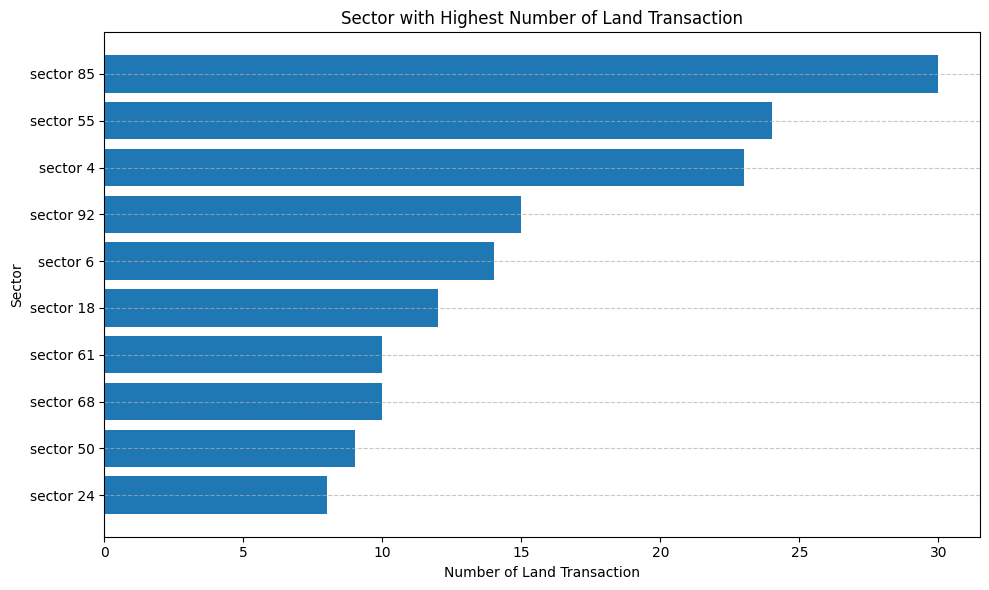

In [46]:
plt.figure(figsize=(10, 6))
plt.barh(dfLand_bySector_sorted_10['sector'], dfLand_bySector_sorted_10['num_land_transactions'])
# plt.axhline(0, color='grey', linewidth=0.8) # Add a line at y=0 for reference
plt.title('Sector with Highest Number of Land Transaction')
plt.xlabel('Number of Land Transaction')
plt.ylabel('Sector')
# plt.xticks(rotation=45, ha='right') # Rotate variable names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.show()
plt.savefig('D:/kuliah smt 7/kapsel/ets/Land_numTransaction.png')

In [7]:
pivot_column = 'sector'
df_land_sector = pd.merge(dfLand_bySector, dfSector, on=pivot_column, how='inner')
# df_land_sector.head()

In [8]:
# selected_column_series = df_land_sector.iloc[:, 6:-1]
# selected_column_series

In [10]:
# if __name__ == "__main__":
coef_list = run_multiple_regression_analysis(df_land_sector['num_land_transactions'], df_land_sector.iloc[:, 6:-1])


Full Regression Summary (R-squared shows overall fit/correlation):
                              OLS Regression Results                             
Dep. Variable:     num_land_transactions   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                   -inf
Method:                    Least Squares   F-statistic:                       nan
Date:                   Wed, 15 Oct 2025   Prob (F-statistic):                nan
Time:                           06:09:46   Log-Likelihood:                 1053.2
No. Observations:                     80   AIC:                            -1946.
Df Residuals:                          0   BIC:                            -1756.
Df Model:                             79                                         
Covariance Type:               nonrobust                                         
                                                                        coef    std err          t      P>|t|   

D:\newAnaconda\envs\jupyterKu\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
D:\newAnaconda\envs\jupyterKu\Lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
D:\newAnaconda\envs\jupyterKu\Lib\site-packages\statsmodels\base\model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


In [48]:
# coef_list

In [11]:
df_coefs = pd.DataFrame(coef_list, columns=['Variable', 'Coefficient'])

# Sort the DataFrame by the absolute value of the Coefficient in descending order
# We use .iloc[1:] to exclude the 'const' (intercept) for ranking importance
df_coefs_sorted = df_coefs.iloc[1:].copy()
df_coefs_sorted['Absolute_Coefficient'] = df_coefs_sorted['Coefficient'].abs()
# Sort by the absolute magnitude and drop the temporary absolute column
df_coefs_sorted = df_coefs_sorted.sort_values(by='Absolute_Coefficient', ascending=False)
df_coef_10Most = df_coefs_sorted[:10]
df_coef_10Most = df_coef_10Most.sort_values(by='Absolute_Coefficient', ascending=True).drop(columns=['Absolute_Coefficient'])
df_coef_10Most

,Variable,Coefficient
99,catering_food_stores_dense,-6.684991e+05
74,residential_area_dense,7.521143e+05
141,education_training_school_education_research_i...,-7.733108e+05
127,medical_health_specialty_hospital_dense,8.526007e+05
131,medical_health_pharmaceutical_healthcare_dense,-9.419021e+05
88,rentable_shops_dense,-9.862261e+05
140,education_training_school_education_kindergart...,-1.170844e+06
115,transportation_facilities_service_bus_station_...,-1.208036e+06
75,office_building_dense,-1.417129e+06
86,bus_station_cnt_dense,2.112812e+06


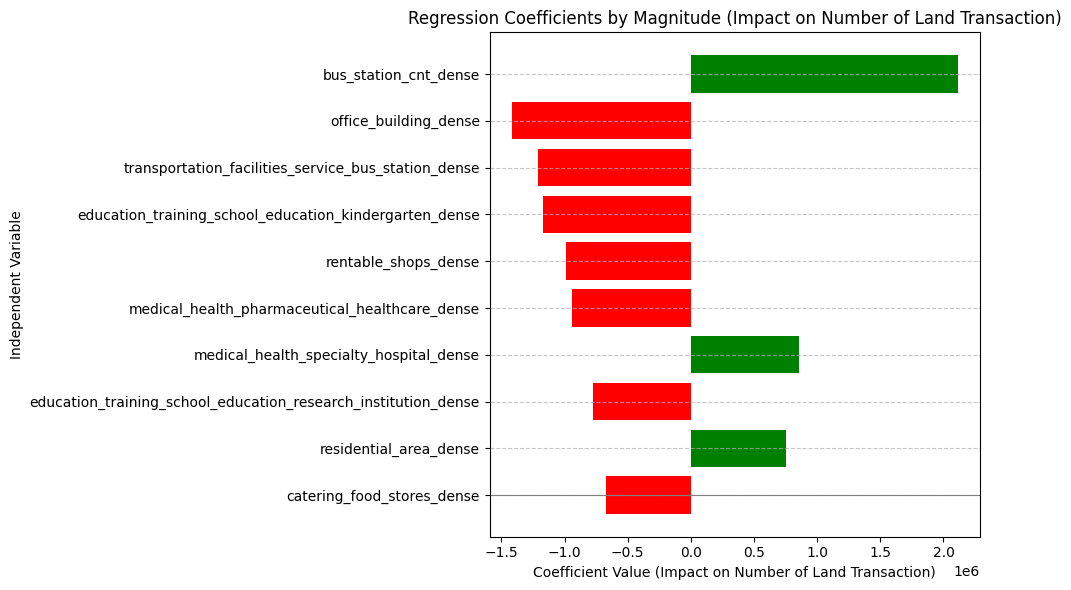

In [13]:
# --- PLOT THE SORTED COEFFICIENTS ---
# Create colors based on the sign of the coefficient (positive = green, negative = red)
colors = ['g' if c > 0 else 'r' for c in df_coef_10Most['Coefficient']]

plt.figure(figsize=(10, 6))
plt.barh(df_coef_10Most['Variable'], df_coef_10Most['Coefficient'], color=colors)
plt.axhline(0, color='grey', linewidth=0.8) # Add a line at y=0 for reference
plt.title('Regression Coefficients by Magnitude (Impact on Number of Land Transaction)')
plt.xlabel('Coefficient Value (Impact on Number of Land Transaction)')
plt.ylabel('Independent Variable')
# plt.xticks(rotation=45, ha='right') # Rotate variable names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.show()
plt.savefig('D:/kuliah smt 7/kapsel/ets/correlation_land_sector.png')

### New House

In [39]:
# file_path = 'D:/kuliah smt 7/kapsel/ets/train/city_indexes.csv'
file_path = os.path.join(directory_path, all_items[4])
# print(file_path)
# print(directory_path)

try:
    dfNewHouse = pd.read_csv(file_path)
    print("CSV data loaded successfully into a pandas DataFrame.")
    # print(df.head()) # Display the first 5 rows to confirm
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

dfNewHouse.head()

CSV data loaded successfully into a pandas DataFrame.


,month,sector,num_new_house_transactions,area_new_house_transactions,price_new_house_transactions,amount_new_house_transactions,area_per_unit_new_house_transactions,total_price_per_unit_new_house_transactions,num_new_house_available_for_sale,area_new_house_available_for_sale,period_new_house_sell_through
0,2019-Jan,sector 1,52,4906,28184,13827.14,94,265.91,159.0,15904.0,3.78
1,2019-Jan,sector 2,145,15933,17747,28277.73,110,195.02,1491.0,175113.0,12.29
2,2019-Jan,sector 4,6,725,28004,1424.21,127,356.05,40.0,6826.0,5.95
3,2019-Jan,sector 5,2,212,37432,792.10,106,396.05,161.0,17173.0,83.95
4,2019-Jan,sector 6,5,773,15992,607.94,95,151.99,189.0,19696.0,14.27


In [41]:
# 1. Group the DataFrame by 'sector'
dfNewHouse_bySector = dfNewHouse.groupby('sector').sum().reset_index()
# dfNewHouse_bySector.head()
dfNewHouse_bySector_sorted = dfNewHouse_bySector.sort_values(by='num_new_house_transactions', ascending=False)
dfNewHouse_bySector_sorted_10 = dfNewHouse_bySector_sorted[:10]
dfNewHouse_bySector_sorted_10 = dfNewHouse_bySector_sorted_10.sort_values(by='num_new_house_transactions', ascending=True)
# dfNewHouse_bySector_sorted_10.head()

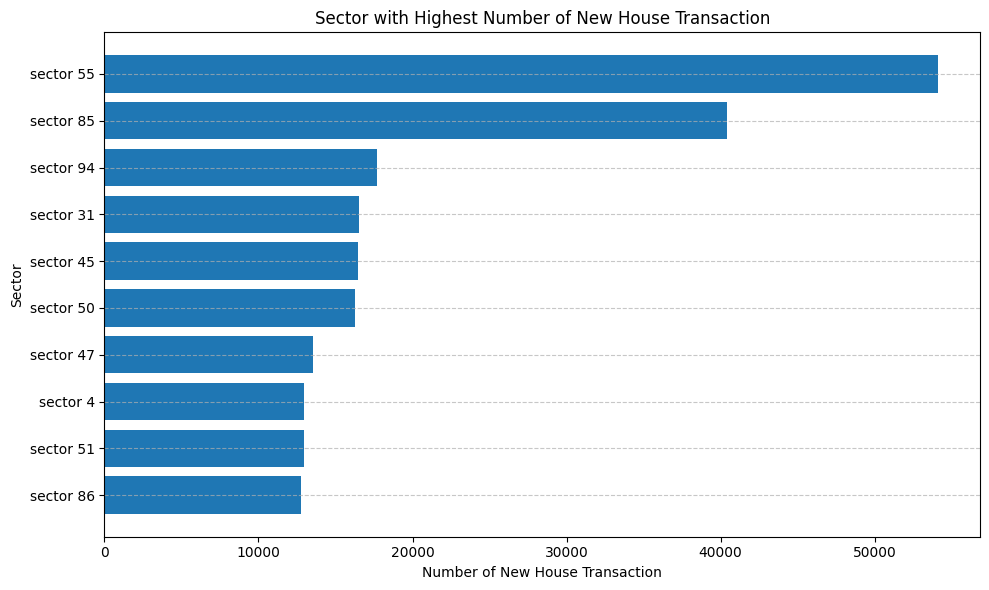

In [42]:
plt.figure(figsize=(10, 6))
plt.barh(dfNewHouse_bySector_sorted_10['sector'], dfNewHouse_bySector_sorted_10['num_new_house_transactions'])
# plt.axhline(0, color='grey', linewidth=0.8) # Add a line at y=0 for reference
plt.title('Sector with Highest Number of New House Transaction')
plt.xlabel('Number of New House Transaction')
plt.ylabel('Sector')
# plt.xticks(rotation=45, ha='right') # Rotate variable names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.show()
plt.savefig('D:/kuliah smt 7/kapsel/ets/NewHouse_numTransaction.png')

In [19]:
pivot_column = 'sector'
dfNewHouse_sector = pd.merge(dfNewHouse_bySector, dfSector, on=pivot_column, how='inner')
# dfNewHouse_sector.head()

In [19]:
# selected_column_series = df_land_sector.iloc[:, 6:-1]
# selected_column_series

In [18]:
# if __name__ == "__main__":
coef_list_newHouse = run_multiple_regression_analysis(dfNewHouse_bySector['num_new_house_transactions'], dfNewHouse_bySector.iloc[:, 12:13])


Full Regression Summary (R-squared shows overall fit/correlation):
                                OLS Regression Results                                
Dep. Variable:     num_new_house_transactions   R-squared:                      -0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                       nan
Date:                        Wed, 15 Oct 2025   Prob (F-statistic):                nan
Time:                                06:13:52   Log-Likelihood:                -985.30
No. Observations:                          95   AIC:                             1973.
Df Residuals:                              94   BIC:                             1975.
Df Model:                                   0                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0

In [56]:
coef_list_newHouse

[('const', 2515547.673684211)]

In [44]:
df_coefs = pd.DataFrame(coef_list_newHouse, columns=['Variable', 'Coefficient'])

# Sort the DataFrame by the absolute value of the Coefficient in descending order
# We use .iloc[1:] to exclude the 'const' (intercept) for ranking importance
df_coefs_sorted = df_coefs.iloc[1:].copy()
df_coefs_sorted['Absolute_Coefficient'] = df_coefs_sorted['Coefficient'].abs()
# Sort by the absolute magnitude and drop the temporary absolute column
df_coefs_sorted = df_coefs_sorted.sort_values(by='Absolute_Coefficient', ascending=False).drop(columns=['Absolute_Coefficient'])
df_coef_10Most = df_coefs_sorted[:10]

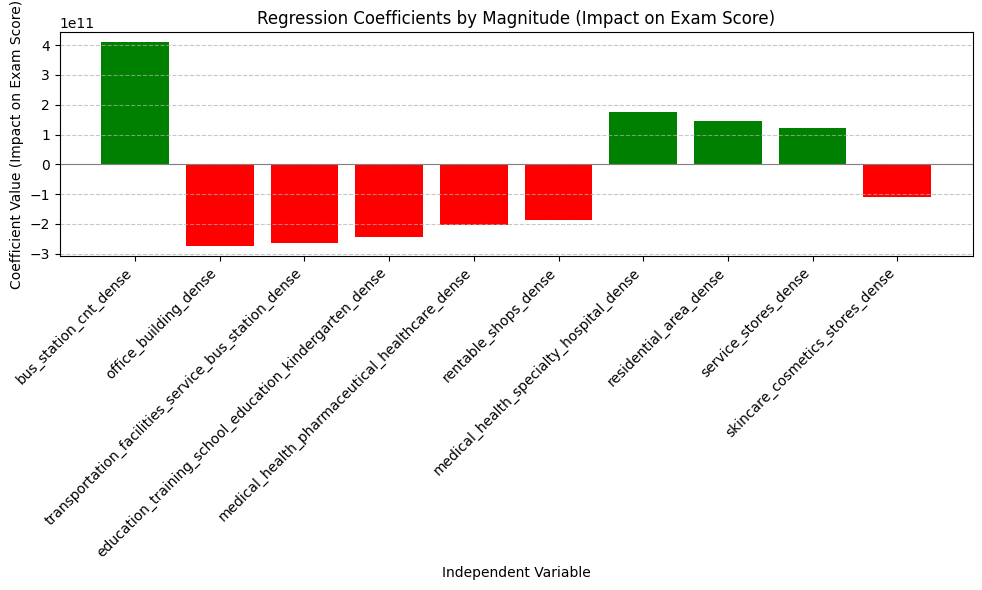

In [45]:
# --- PLOT THE SORTED COEFFICIENTS ---
# Create colors based on the sign of the coefficient (positive = green, negative = red)
colors = ['g' if c > 0 else 'r' for c in df_coefs_sorted['Coefficient']]

plt.figure(figsize=(10, 6))
plt.bar(df_coef_10Most['Variable'], df_coef_10Most['Coefficient'], color=colors)
plt.axhline(0, color='grey', linewidth=0.8) # Add a line at y=0 for reference
plt.title('Regression Coefficients by Magnitude (Impact on Exam Score)')
plt.ylabel('Coefficient Value (Impact on Exam Score)')
plt.xlabel('Independent Variable')
plt.xticks(rotation=45, ha='right') # Rotate variable names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pre Owned

In [20]:
# file_path = 'D:/kuliah smt 7/kapsel/ets/train/city_indexes.csv'
file_path = os.path.join(directory_path, all_items[6])
# print(file_path)
# print(directory_path)

try:
    dfPreOwned = pd.read_csv(file_path)
    print("CSV data loaded successfully into a pandas DataFrame.")
    # print(df.head()) # Display the first 5 rows to confirm
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Check the path.")
except Exception as e:
    print(f"An error occurred: {e}")

# dfPreOwned.head()

CSV data loaded successfully into a pandas DataFrame.


In [30]:
# dfPreOwned_bySector.head()

In [35]:
# 1. Group the DataFrame by 'sector'
dfPreOwned_bySector = dfPreOwned.groupby('sector').sum().reset_index()
# dfNewHouse_bySector.head()
dfPreOwned_bySector_sorted = dfPreOwned_bySector.sort_values(by='num_pre_owned_house_transactions', ascending=False)
dfPreOwned_bySector_sorted_10 = dfPreOwned_bySector_sorted[:10]
dfPreOwned_bySector_sorted_10 = dfPreOwned_bySector_sorted_10.sort_values(by='num_pre_owned_house_transactions', ascending=True)
# dfPreOwned_bySector_sorted_10

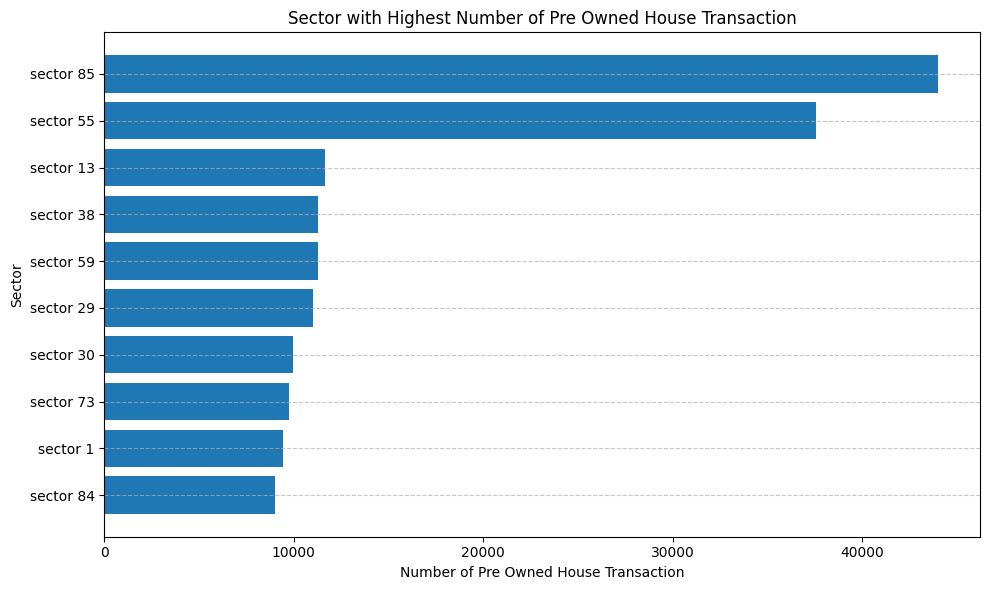

In [38]:
plt.figure(figsize=(10, 6))
plt.barh(dfPreOwned_bySector_sorted_10['sector'], dfPreOwned_bySector_sorted_10['num_pre_owned_house_transactions'])
# plt.axhline(0, color='grey', linewidth=0.8) # Add a line at y=0 for reference
plt.title('Sector with Highest Number of Pre Owned House Transaction')
plt.xlabel('Number of Pre Owned House Transaction')
plt.ylabel('Sector')
# plt.xticks(rotation=45, ha='right') # Rotate variable names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.show()
plt.savefig('D:/kuliah smt 7/kapsel/ets/PreOwned_numTransaction.png')

In [22]:
pivot_column = 'sector'
dfPreOwned_sector = pd.merge(dfPreOwned_bySector, dfSector, on=pivot_column, how='inner')
dfPreOwned_sector.columns

Index(['sector', 'month', 'area_pre_owned_house_transactions',
       'amount_pre_owned_house_transactions',
       'num_pre_owned_house_transactions',
       'price_pre_owned_house_transactions', 'sector_coverage',
       'population_scale', 'residential_area', 'office_building',
       ...
       'education_training_school_education_middle_school_dense',
       'education_training_school_education_primary_school_dense',
       'education_training_school_education_kindergarten_dense',
       'education_training_school_education_research_institution_dense',
       'Unnamed: 142', 'Unnamed: 143', 'Unnamed: 144', 'Unnamed: 145',
       'Unnamed: 146', '73'],
      dtype='object', length=153)

In [23]:
# selected_column_series = df_land_sector.iloc[:, 6:-1]
# selected_column_series

In [24]:
# if __name__ == "__main__":
coef_list_PreOwned = run_multiple_regression_analysis(dfPreOwned_sector['num_pre_owned_house_transactions'], dfPreOwned_sector.iloc[:, 6:-1])


Full Regression Summary (R-squared shows overall fit/correlation):
                                   OLS Regression Results                                   
Dep. Variable:     num_pre_owned_house_transactions   R-squared:                       1.000
Model:                                          OLS   Adj. R-squared:                   -inf
Method:                               Least Squares   F-statistic:                       nan
Date:                              Wed, 15 Oct 2025   Prob (F-statistic):                nan
Time:                                      06:14:24   Log-Likelihood:                 60.732
No. Observations:                                77   AIC:                             32.54
Df Residuals:                                     0   BIC:                             213.0
Df Model:                                        76                                         
Covariance Type:                          nonrobust                                         
  

D:\newAnaconda\envs\jupyterKu\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
D:\newAnaconda\envs\jupyterKu\Lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
D:\newAnaconda\envs\jupyterKu\Lib\site-packages\statsmodels\base\model.py:1527: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


In [77]:
coef_list_PreOwned

[('const', 1591480.1268931748),
 ('sector_coverage', 1070192.7905479325),
 ('population_scale', -61.629051221355795),
 ('residential_area', -20994.6202355308),
 ('office_building', 14885.485160068705),
 ('commercial_area', -275409.70433732803),
 ('resident_population', 75.54421733942934),
 ('office_population', 3.0101029008613347),
 ('number_of_shops', -1201.467680805939),
 ('catering', 304.77817033707885),
 ('retail', 1788.2821559554282),
 ('hotel', -2947.319884881787),
 ('transportation_station', -4656.2010409984905),
 ('education', -3118.993435043577),
 ('leisure_and_entertainment', 3688.1154825164936),
 ('bus_station_cnt', 23598.7290485622),
 ('subway_station_cnt', 444012.97696048906),
 ('rentable_shops', 31579.27954326008),
 ('surrounding_housing_average_price', -28.6264857164442),
 ('surrounding_shop_average_rent', -1711.074365084312),
 ('leisure_entertainment_entertainment_venue_game_arcade',
  -167354.98670966533),
 ('leisure_entertainment_entertainment_venue_party_house', 9791

In [25]:
df_coefs_PreOwned = pd.DataFrame(coef_list_PreOwned, columns=['Variable', 'Coefficient'])

# Sort the DataFrame by the absolute value of the Coefficient in descending order
# We use .iloc[1:] to exclude the 'const' (intercept) for ranking importance
df_coefs_PreOwned_sorted = df_coefs_PreOwned.iloc[1:].copy()
df_coefs_PreOwned_sorted['Absolute_Coefficient'] = df_coefs_PreOwned_sorted['Coefficient'].abs()
# Sort by the absolute magnitude and drop the temporary absolute column
df_coefs_PreOwned_sorted = df_coefs_PreOwned_sorted.sort_values(by='Absolute_Coefficient', ascending=False)
df_coefs_PreOwned_sorted_10Most = df_coefs_PreOwned_sorted[:10]
df_coefs_PreOwned_sorted_10Most = df_coefs_PreOwned_sorted_10Most.sort_values(by='Absolute_Coefficient', ascending=True).drop(columns=['Absolute_Coefficient'])
df_coefs_PreOwned_sorted_10Most

,Variable,Coefficient
82,hotel_dense,-1.567294e+07
83,transportation_station_dense,-1.724216e+07
94,fashion_stores_dense,1.856179e+07
99,catering_food_stores_dense,2.011833e+07
115,transportation_facilities_service_bus_station_...,2.402557e+07
131,medical_health_pharmaceutical_healthcare_dense,3.188714e+07
126,medical_health_dense,4.146532e+07
85,leisure_and_entertainment_dense,-4.197019e+07
88,rentable_shops_dense,4.582166e+07
84,education_dense,5.588957e+07


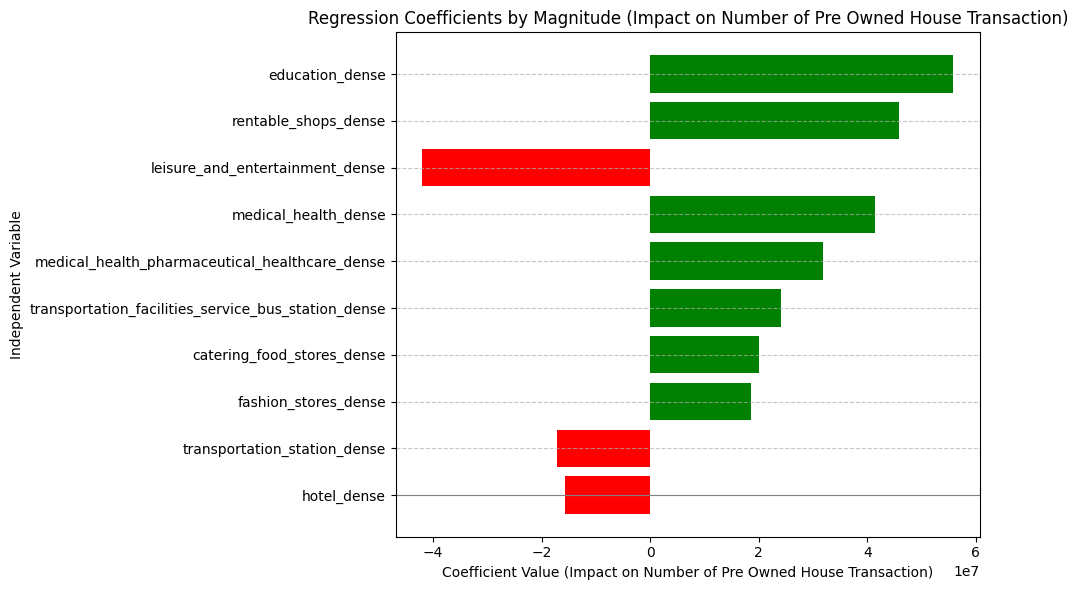

In [27]:
# --- PLOT THE SORTED COEFFICIENTS ---
# Create colors based on the sign of the coefficient (positive = green, negative = red)
colors = ['g' if c > 0 else 'r' for c in df_coefs_PreOwned_sorted_10Most['Coefficient']]

plt.figure(figsize=(10, 6))
plt.barh(df_coefs_PreOwned_sorted_10Most['Variable'], df_coefs_PreOwned_sorted_10Most['Coefficient'], color=colors)
plt.axhline(0, color='grey', linewidth=0.8) # Add a line at y=0 for reference
plt.title('Regression Coefficients by Magnitude (Impact on Number of Pre Owned House Transaction)')
plt.xlabel('Coefficient Value (Impact on Number of Pre Owned House Transaction)')
plt.ylabel('Independent Variable')
# plt.xticks(rotation=45, ha='right') # Rotate variable names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.show()
plt.savefig('D:/kuliah smt 7/kapsel/ets/correlation_preOwned_sector.png')